In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [14]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Ionosphere\Ionosphere_NN_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [15]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	9
int64		column 2	0
float64		column 3	3
float64		column 4	3
float64		column 5	3
float64		column 6	3
float64		column 7	3
float64		column 8	3
float64		column 9	3
float64		column 10	0
float64		column 11	3
float64		column 12	3
float64		column 13	3
float64		column 14	6
float64		column 15	0
float64		column 16	6
float64		column 17	6
float64		column 18	0
float64		column 19	0
float64		column 20	0
float64		column 21	6
float64		column 22	3
float64		column 23	0
float64		column 24	6
float64		column 25	6
float64		column 26	0
float64		column 27	0
float64		column 28	3
float64		column 29	0
float64		column 30	3
float64		column 31	3
float64		column 32	6
float64		column 33	0
float64		column 34	3


In [16]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,342.000000,351.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,351.000000,...,345.000000,351.000000,351.000000,348.000000,351.000000,348.000000,348.000000,345.000000,351.000000,348.000000
mean,0.891813,0.0,0.640543,0.042699,0.604349,0.115160,0.561718,0.114116,0.510818,0.181345,...,0.398256,-0.071187,0.541641,-0.066748,0.378445,-0.023674,0.364173,0.007159,0.349364,0.014982
std,0.311072,0.0,0.498762,0.438918,0.514515,0.457837,0.477755,0.519661,0.507197,0.483851,...,0.574521,0.508495,0.516205,0.548723,0.575886,0.507293,0.559880,0.508798,0.522663,0.467565
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472753,-0.064083,0.412765,-0.024722,0.245455,-0.055640,0.087435,-0.048075,...,0.000000,-0.332390,0.286435,-0.424538,0.000000,-0.231825,0.000000,-0.229490,0.000000,-0.163890
50%,1.000000,0.0,0.870795,0.015340,0.811145,0.021170,0.736275,0.013795,0.682430,0.018290,...,0.553890,-0.015050,0.708240,-0.017685,0.496640,0.000000,0.451060,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.191142,1.000000,0.331905,0.972600,0.393783,0.952295,0.534195,...,0.900710,0.156765,0.999945,0.152207,0.883465,0.156112,0.861930,0.203590,0.813765,0.167695
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

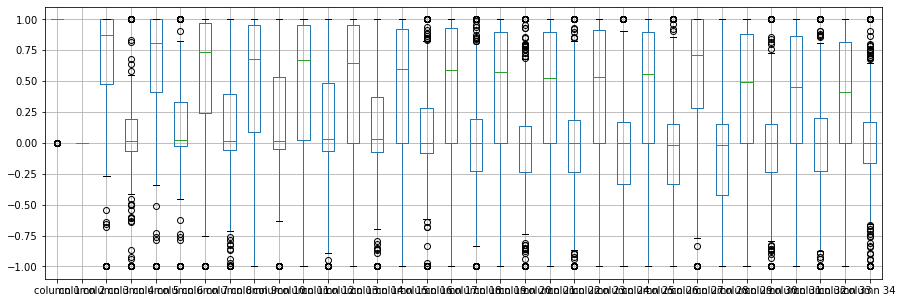

In [17]:
df.boxplot(return_type='axes', figsize=(15,5))

In [18]:
df.mean()

column 1     0.891813
column 2     0.000000
column 3     0.640543
column 4     0.042699
column 5     0.604349
column 6     0.115160
column 7     0.561718
column 8     0.114116
column 9     0.510818
column 10    0.181345
column 11    0.474491
column 12    0.156480
column 13    0.405309
column 14    0.088125
column 15    0.344159
column 16    0.066302
column 17    0.382525
column 18   -0.003617
column 19    0.359390
column 20   -0.024025
column 21    0.347365
column 22    0.011468
column 23    0.362475
column 24   -0.050331
column 25    0.398256
column 26   -0.071187
column 27    0.541641
column 28   -0.066748
column 29    0.378445
column 30   -0.023674
column 31    0.364173
column 32    0.007159
column 33    0.349364
column 34    0.014982
dtype: float64

In [19]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,NaN,0.299306,0.011916,0.128058,0.130681,0.207374,0.023763,0.185581,-0.052439,...,0.034715,0.151323,-0.196322,-0.025498,0.118972,-0.139931,0.129949,-0.081162,0.161749,0.009325
column 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
column 3,0.299306,NaN,1.000000,0.175870,0.470386,0.036058,0.454323,0.001740,0.470425,0.051561,...,0.318778,-0.077460,0.075746,0.125268,0.341582,0.058489,0.239718,-0.016617,0.262040,-0.001210
column 4,0.011916,NaN,0.175870,1.000000,-0.000814,-0.186813,-0.002485,0.235432,-0.302673,0.207542,...,-0.085903,-0.234735,-0.052361,-0.026411,-0.043128,0.331031,-0.155756,-0.153987,-0.141231,0.044992
column 5,0.128058,NaN,0.470386,-0.000814,1.000000,0.013753,0.584704,-0.015088,0.434782,-0.022422,...,0.229668,-0.018337,0.149899,0.164265,0.240674,0.071225,0.391744,0.020636,0.400597,-0.128677
column 6,0.130681,NaN,0.036058,-0.186813,0.013753,1.000000,-0.050820,0.264120,-0.119530,0.213904,...,-0.166350,0.040182,-0.179536,-0.064034,-0.023086,-0.164084,-0.099666,0.322250,0.013999,0.183500
column 7,0.207374,NaN,0.454323,-0.002485,0.584704,-0.050820,1.000000,-0.154538,0.454867,-0.099188,...,0.312021,0.102514,0.112103,0.082563,0.295794,-0.010647,0.394756,-0.030590,0.523543,-0.086421
column 8,0.023763,NaN,0.001740,0.235432,-0.015088,0.264120,-0.154538,1.000000,-0.322906,0.365791,...,-0.173930,-0.131678,-0.253193,0.067005,-0.140784,0.076368,-0.177239,0.135863,-0.198923,0.370596
column 9,0.185581,NaN,0.470425,-0.302673,0.434782,-0.119530,0.454867,-0.322906,1.000000,-0.253932,...,0.348487,0.097994,0.168561,0.138055,0.328460,-0.038987,0.328509,-0.072643,0.348676,-0.101422
column 10,-0.052439,NaN,0.051561,0.207542,-0.022422,0.213904,-0.099188,0.365791,-0.253932,1.000000,...,-0.240505,-0.043680,-0.250947,0.081443,-0.123296,-0.009033,-0.153676,-0.007249,-0.203629,0.107235


In [20]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [21]:
imputer = md.Midas(layer_structure = [34,34+42,34+42+42,34+42+42+42,34+42+42+42+42,34+42+42+42,34+42+42,34+42,34], vae_layer = False, seed = 420)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 20.170088904244558
Epoch: 1 , loss: 20.10327657063802
Epoch: 2 , loss: 19.973436764308385
Epoch: 3 , loss: 20.047740300496418
Epoch: 4 , loss: 20.057101930890763
Epoch: 5 , loss: 19.906941595531645
Epoch: 6 , loss: 19.874196279616584
Epoch: 7 , loss: 19.89662960597447
Epoch: 8 , loss: 19.826472963605607
Epoch: 9 , loss: 19.755480720883323
Epoch: 10 , loss: 19.760424568539573
Epoch: 11 , loss: 19.54171307881673
Epoch: 12 , loss: 19.347957792736235
Epoch: 13 , loss: 18.72789900643485
Epoch: 14 , loss: 17.856349036807107
Epoch: 15 , loss: 17.623124031793502
Epoch: 16 , loss: 17.654436202276322
Epoch: 17 , loss: 17.4021391641526
Epoch: 18 , loss: 17.3822535106114
Epoch: 19 , loss: 17.51142624446324
Epoch: 20 , loss: 17.296563466389973
Epoch: 21 , loss: 17.32147216796875
Epoch: 22 , loss: 17.226258232480003
Epoch: 23 , loss: 17.294296537126815
Epoch: 24 , loss: 17.234822909037273
Epoch: 25 , loss: 17.293458

In [22]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(351, 34)

In [23]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     0.0
column 2     0.0
column 3     1.0
column 4     1.0
column 5     0.0
column 6     0.0
column 7     0.0
column 8     0.0
column 9    -1.0
column 10   -1.0
column 11    0.0
column 12    0.0
column 13    0.0
column 14    0.0
column 15   -1.0
column 16   -1.0
column 17   -1.0
column 18   -1.0
column 19   -1.0
column 20    1.0
column 21   -1.0
column 22    1.0
column 23    0.0
column 24    0.0
column 25    0.0
column 26    0.0
column 27    1.0
column 28   -1.0
column 29   -1.0
column 30    1.0
column 31   -1.0
column 32    1.0
column 33   -1.0
column 34    1.0
Name: 21, dtype: float64

In [24]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Ionosphere.xlsx', header=None,names=column_names)

In [25]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
347,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
348,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
349,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [26]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [27]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [28]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

6.326127208982547

In [29]:
denominator=Frobenius_norm(complete_df)
denominator

68.46016929900117

In [30]:
NRMS=numerator/denominator
NRMS


0.09240595332671556

In [31]:
new_df.iloc[66,:]

column 1     1.00000
column 2     0.00000
column 3     1.00000
column 4     0.28046
column 5     1.00000
column 6     0.02477
column 7     1.00000
column 8     0.07764
column 9     1.00000
column 10    0.04317
column 11    0.98762
column 12    0.00578
column 13    1.00000
column 14    0.05489
column 15    1.00000
column 16    0.04384
column 17    0.95750
column 18   -0.24598
column 19    0.84371
column 20   -0.08668
column 21    1.00000
column 22    0.04150
column 23    0.99933
column 24    0.27376
column 25    1.00000
column 26   -0.39056
column 27    0.96414
column 28   -0.02174
column 29    0.86747
column 30    0.23360
column 31    0.94578
column 32   -0.22021
column 33    0.80355
column 34   -0.07329
Name: 66, dtype: float64

In [32]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.0,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1.0,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1.0,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1.0,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1.0,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1.0,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,...,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307
347,1.0,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
348,1.0,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,...,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577
349,1.0,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,...,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243


In [33]:
imputations[-1].to_excel("Ionosphere_NN_1(imp).xlsx", index=False, header=False)